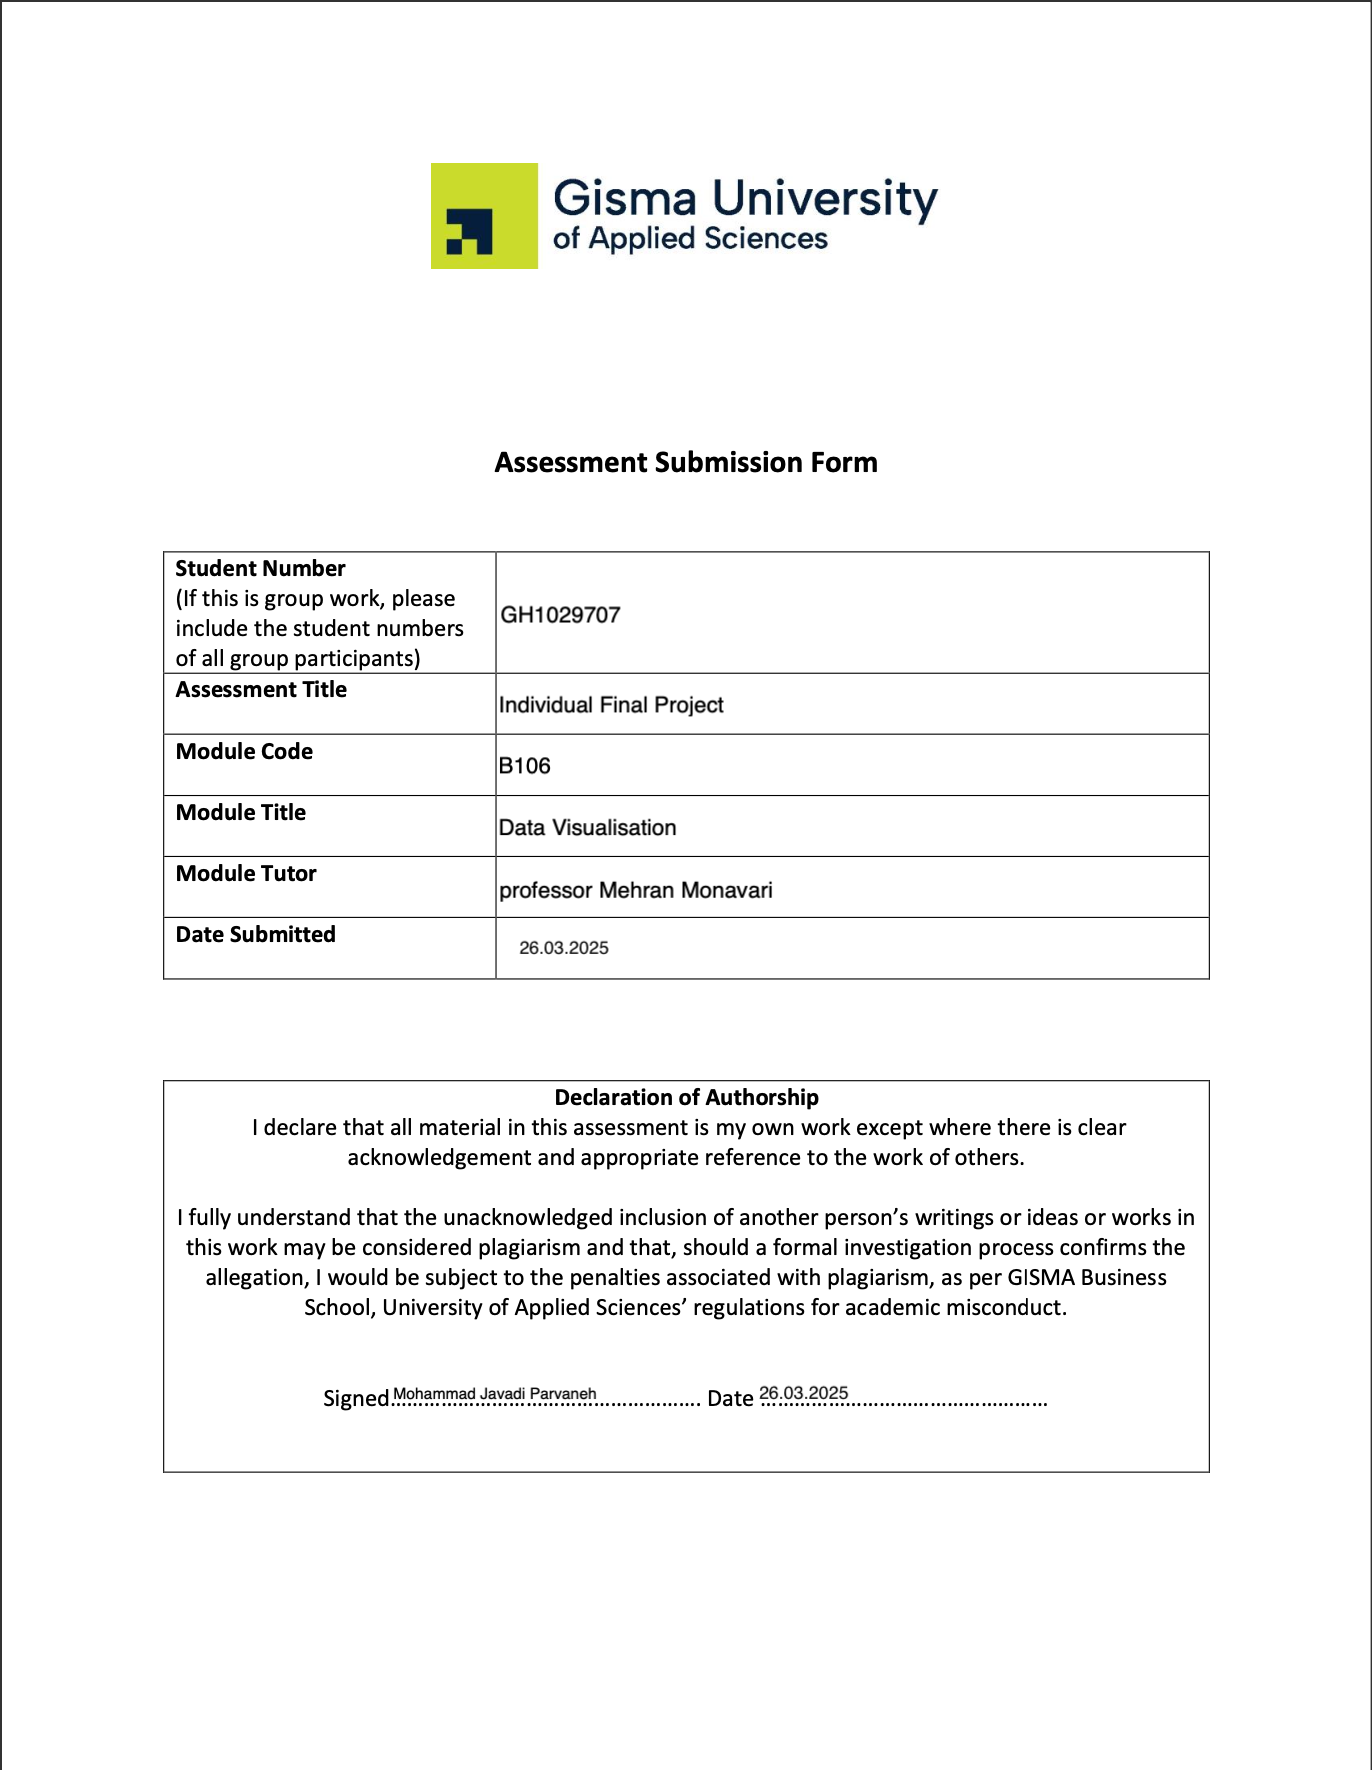

# **My Project Github link:**


https://github.com/mohammadjavadi8804/B106-Data-Visualisation.git

**About my Project and Dataset:**

I have choosed:

** TMDB 5000 Movie Dataset**,

 for my Project.

As far as I am big fan of movies, this Pipeline will help me to know more about movie industry.
As a data Scientist I am trying to create an explanatory data analysis pipeline to respresent my insights.

I used this dataset for my project:

https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

I think it is rich enough for insights and diverse visualizations.

In this business, I want to have more customers and I want to persuade people to buy more our premium accounts For themselves.
This analysis will help the marketing team and also the sales team department to have more seles in comparison with the past and invest more in specific movie types.
This analysis helps the sales department team to identify high-performing films based on for example regional trends or even different Genres. Some questions popped up in my mind and I tried to implement appropriate visualization to reach out my answers. I just have 5 questions and I have tried to answer all of them. I hope this will be helpful.



I tried to import the dataset from Kaggle to my Google Colab

In [1]:
import kagglehub
# downloading the latest version
path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")
print ("path to dataser files:", path)

100%|██████████| 8.89M/8.89M [00:00<00:00, 82.7MB/s]

Extracting files...


path to dataser files: /root/.cache/kagglehub/datasets/tmdb/tmdb-movie-metadata/versions/2


**Step 2**


**I would try to do the tasks below for my database:**

1-check the quality issues like missing values and outliers and duplicate data

2-clean the data using python

3-fixing the data, I mean handling the missing values and data normalization.


In [2]:
#I load the dataset
import os

#checking the downloaded files
print(os.listdir(path))

['tmdb_5000_credits.csv', 'tmdb_5000_movies.csv']


In [3]:
import pandas as pd

# loading the dataset by modifying the file name
df = pd.read_csv(f"{path}/tmdb_5000_credits.csv")

In [4]:
# I am trying to know about cheking the issues
# I am cheking the basis information
print(df.info()) #I am checking missing values and data types
print(df.describe()) #I need the summary of dataset
print(df.duplicated().sum()) #I would like to see duplicate rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB
None
            movie_id
count    4803.000000
mean    57165.484281
std     88694.614033
min         5.000000
25%      9014.500000
50%     14629.000000
75%     58610.500000
max    459488.000000
0


In [5]:
# I tried to clean and remove duplicated data
df = df.drop_duplicates()

In [6]:
# I tried to handling the missing values
df = df.dropna() # It removes rows with missing values or used imputation

In [7]:
# I tried to save an clean and prepared data
df.to_csv("cleaned_data.csv", index=False)


**Step 3**

I am trying to extract meaningful insights from this mentioned dataset


In tmdb_5000_credits.csv we have **4 columns and 4803 rows**

columns **contain movie_id, title, cast and crew**

In tmdb_5000_movies.csv we have **20 columns and 4803 rows**

columns contain **budget, genres, popularity, revenue, runtime, vote average and more**.


In [8]:
# I tried to import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#load dataset in modified filename
df = pd.read_csv(f"{path}/tmdb_5000_movies.csv")




✅***Question number 1:***

Is there a **relationship between a movie's budget and its revenue**?

# ***Insights***:

This scatter plot allows us to observe any correlation between a higher budget and greater revenue.
After looking exact at plot we understand a clear positive correlation between budget and revenue, that mean higher- budget movies tend to generate more revenue. However we can also see some exceptions.

the top **five popular movies based on revenue** are:

1-Avatar

2-Titanic

3-The Avengers

4-Jurassic World

5-Fast and Furious 7



***Code Explanation:***

I used a scatter plot to visualize the relationship between the "budget" and "revenue" columns in the movies dataset.I Use **Seaborn** for enhanced visuals and interactivity.


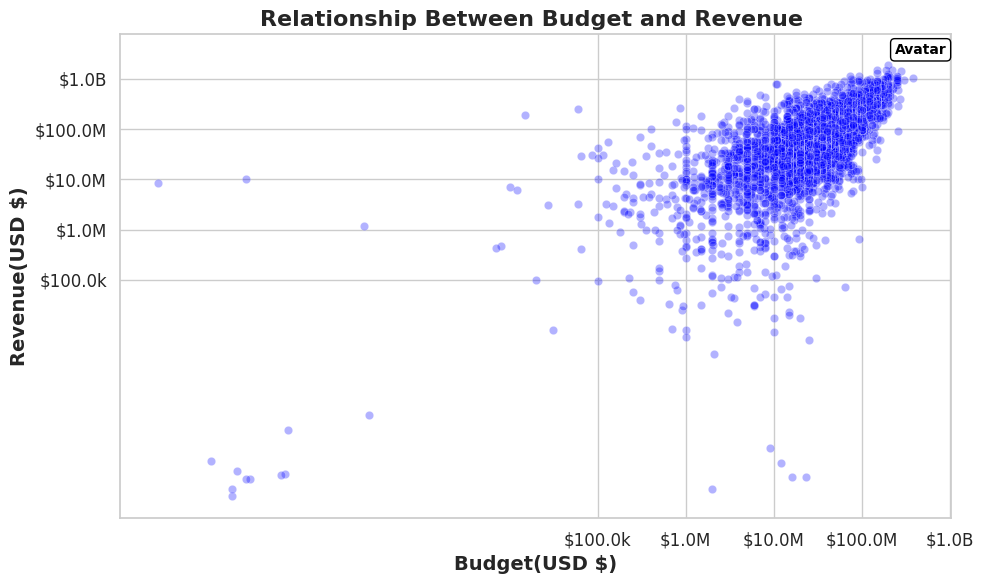

In [9]:
#✅Is there a relationship between a movie's budget and its revenue?
#First I tried to import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#loading the dataset
movies_df = pd.read_csv(f"{path}/tmdb_5000_movies.csv")
#Filterin the movies with zero or missing budget/revenue
movies_df = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] >0 )]
#In this data set movie budgets and revenues very widely(from thoudans to billion).
#Without log transformation,smaller values would be hard to see
#Secondly, it is necessary to not have highly skewed scatter plot
#This transformation helps normalize the scale.
#Let's do it:
movies_df['log_budget'] = np.log10(movies_df['budget'])
movies_df['log_revenue'] = np.log10(movies_df['revenue'])
#I use a function to convert log scale to readable format
def log_to_human(log_value):
    value = 10 ** log_value
    if value >= 1_000_000_000:
          return f"${value / 1_000_000_000:.1f}B"
    elif value >= 1_000_000:
        return f"${value / 1_000_000:.1f}M"
    else:
        return f"${value / 1_000:.1f}k"
#Let's plot: Relationship Between Budget and Revenue
plt.figure(figsize=(10,6 ))
sns.set_theme(style="whitegrid")
scatter = sns.scatterplot(
    data=movies_df,
    x="log_budget",
    y="log_revenue",
#For increasing the visibility
    alpha=0.3,
    color="blue"
)
#In this part I tried to add titles and labels
plt.title('Relationship Between Budget and Revenue ', fontsize=16, weight='bold')
plt.xlabel('Budget(USD $)', fontsize=14, weight='bold')
plt.ylabel('Revenue(USD $)', fontsize=14,weight='bold')
#We need clear financial values and we also need to format axis tick labels:
#Example tick positions
log_ticks = [5, 6, 7, 8, 9]
plt.xticks(log_ticks, [log_to_human(tick) for tick in log_ticks], fontsize=12)
plt.yticks(log_ticks, [log_to_human(tick) for tick in log_ticks], fontsize=12)
#Let's highlighting top movie by revenue in our chart:
top_movies = movies_df.nlargest(1, 'revenue')
for _, row in top_movies.iterrows():
    plt.text(
        row['log_budget'],
    #Adding offset for better visualisation
        row['log_revenue'] + 0.05,
        row['title'],
        fontsize=10,
        color='black',
        weight='bold',
        #For background for clarity
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')

    )
plt.tight_layout()
plt.show()



✅***Question number 2: ***

What are the most popular movie genres?


***Insights:***

This bar chart gives us a clear picture of movie industries.**Drama** is definitely **the most popular** and **westerns** and **documentaries** seem to be **on the rarer side**. By knowing this fact, we can use it as a guid to decide what kind of movies to make and who to aim them at.
Another important thing is **creating the hybrid genres**. That hybrid movies have a wider appeal. For example , **blending Comedy and Drama** might just **hit the sweet spot** for a lot of different viewers.

***Code Explanation:***

I extracted genre information "genres" column and counted occurrences to create a bar chart. I used **Ploty** which we have learned in **session 6** for improving my visualisation.


In [10]:

#✅What are the most popular movie genres?
#For addressing this question we create the chart below.
# 2.Frequency of movie Genres Bar Chart
#I tried to import libraries.
import pandas as pd
import plotly.express as px
#I load the dataset
movies_df = pd.read_csv(f"{path}/tmdb_5000_movies.csv")
# I have to calculate genre_counts in advance
movies_df['genres'] = movies_df['genres'].apply(lambda x: [genre['name'] for genre in eval(x)])
all_genres = movies_df['genres'].explode()
genre_counts = all_genres.value_counts()
#we have a lot of genres, so we have select the 5 importance one and group the rest as "other"
#we also have to convert it to DataFrame:
top_genres = genre_counts[:5].to_frame(name='Count')
other_count = genre_counts[5:].sum()
#we have to add "other" row
top_genres.loc['Other'] = other_count
#Let's try to plot horizontal bar chart, it is better for visulisation
fig = px.bar(
    top_genres,
    x='Count',
    y=top_genres.index,
    text='Count',
    title='Top 5 movies Genres Frequency',
#We need to create Horizontal bar chart so we have to use "h"
    orientation='h',
    color=top_genres.index,
#It should better to use just 4 colors so:
    color_discrete_sequence=px.colors.qualitative.Set2[:4]
)
#Let's update the layout and improve readability
fig.update_layout(
    title_font=dict(size=18, family='Arial', color='black'),
    xaxis_title='Number of movies(Count)',
    yaxis_title='Movie genres',
#For removing the legend
    showlegend=False,
    template='plotly_white'
)
fig.update_traces(textposition='outside')
fig.show()




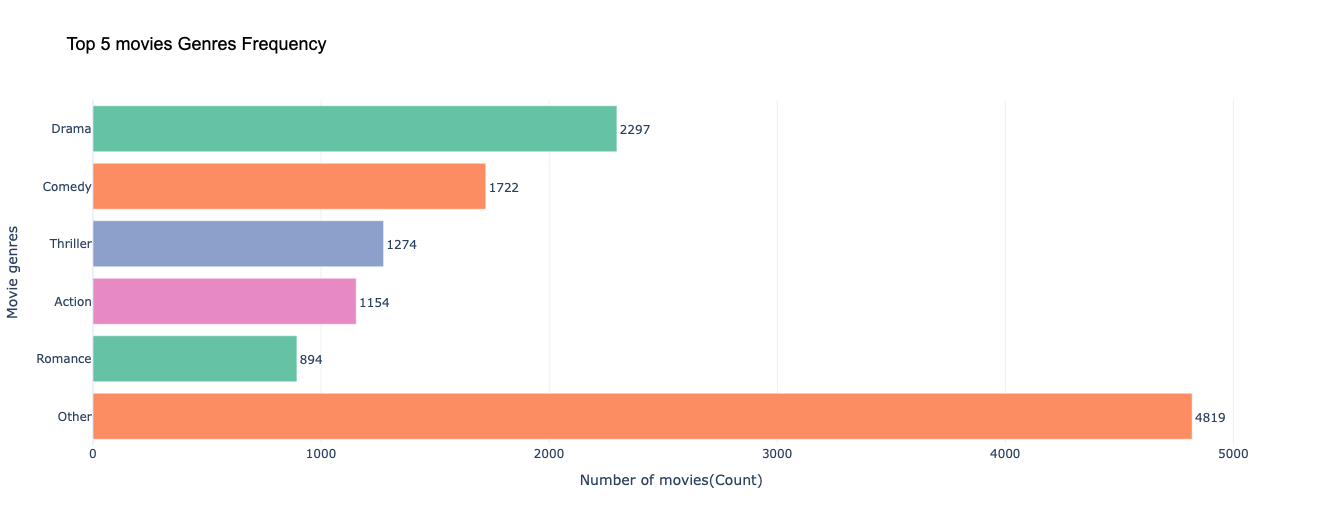


✅***Question number 3:***

 Does the runtime affect the popularity or average rating of a movie?

***Insights: ***

This plot reveals that we **have a weak positive correlation** between **runtime **and **popularity**. That means **movies with longer runtimes** tend to have **slightly higher popularity** in comparision with other movies. This **relationshio is not strong**.


***Code Explanation:***

 The scatter plots were overlaid for **runtime** vs **popularity**. I also used ploty for **enhancing my visuals**. I also filtered point which are more **than > 500**. because it helps us to have a better and clear plot.


In [11]:

#✅Does the runtime affect the popularity or average rating of a movie?
#For address this question, I attempted to plot Runtime against Popularity and Average Rating by using a scatter plot.
# 3. Runtime vs. Popularity and Average Rating Scatter Plot
#First I tried to import library
import pandas as pd
import plotly.express as px
import numpy as np
#Let's load the dataset
movies_df = pd.read_csv(f"{path}/tmdb_5000_movies.csv")
#I have scaled the popularity
movies_df['popularity_scaled'] = movies_df.get('popularity', 0) * 10
#we have a lot of movies and after cleaning the data
#I choose to filter movies which have popularity more than 500
filtered_movies = movies_df[movies_df['popularity_scaled'] > 500]
#Righ now we will have a better visualization
#Let's create a scatter plot of runtime vs. popularity
fig = px.scatter(
    filtered_movies,
    x='runtime',
    y='popularity_scaled',
    title='Runtime vs. popularity',
    hover_name='title',
    color_discrete_sequence=['teal'],
#For having the clean and white background
    template='plotly_white',
    labels={'runtime': 'Runtime (minutes)', 'popularity_scaled':'Popularity Score(Scaled by 10)'}
)
#For having better appearance
fig.update_traces(marker_size=9, opacity=0.75)
#then for showing our plot
fig.show()


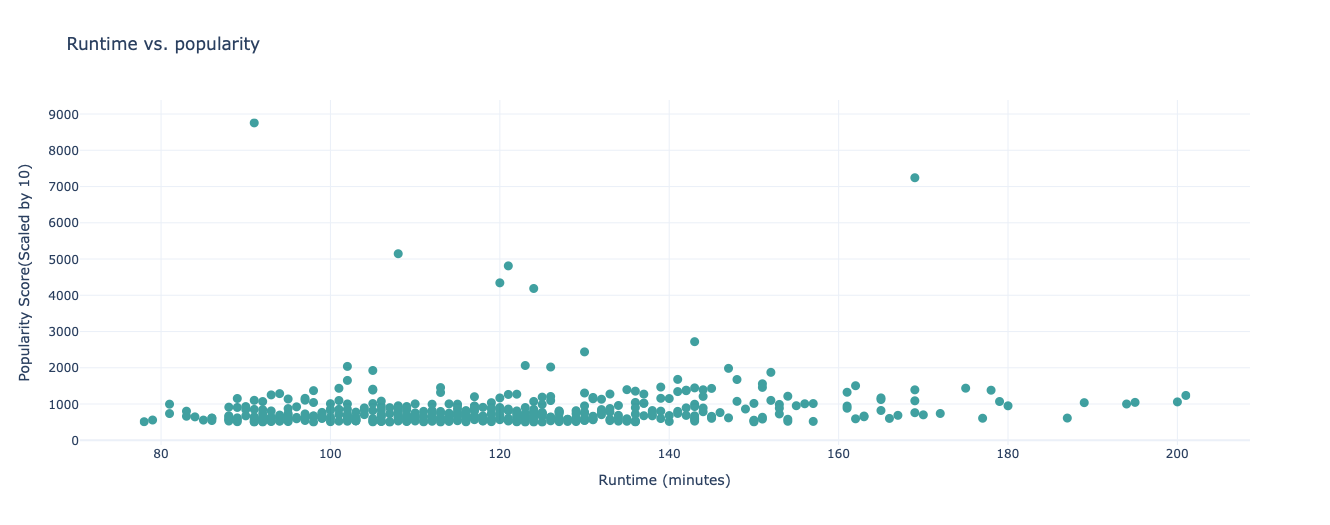

✅***Question number4 : ***

Which production companies contribute most to the highest-grossing movies?



***Insights:***

 The Horizontal bar chart displays the top 5 production companies by total revenue, emphasizing industry leaders.The company with the highest bar on the chart makes the most money.That means they are the best at creating big hits or popular franchises. **The most important** one is **Warner Bros** and the **less important** one is **Dune Entertainment**. We can see the most successful companies are working on different **franchises** and **multiple types of movies**. Another important insight that we can understand is many companies on the list might be owned by bigger media groups. For example, **Pixar and Marvel** are **parts of Disney** and they have same mindsets for this industry and they are successful.




 ***Code Explanation:***


  We aggregated revenue by production company and sorted the top contributors. A Horizontal bar chart was used for clarity and ranking.

<ipython-input-12-b7377254f1fc>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




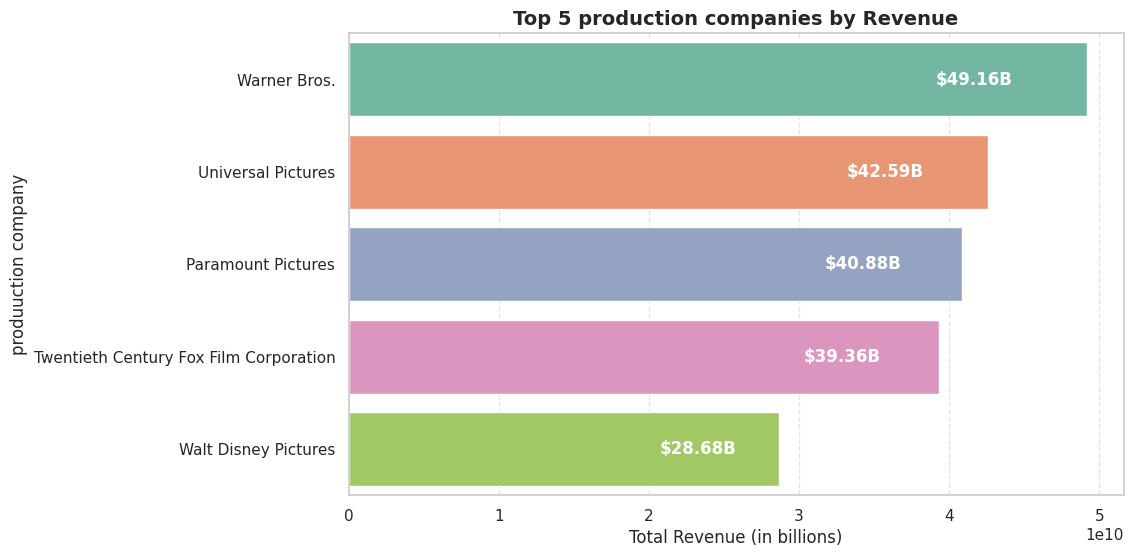

In [12]:
#✅Which production companies contribute most to the highest-grossing movies?
#For answering this question I trried to plot the chart below.
#4. production companies contribution horizontal Bar chart
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#I Load datasets
movies_df = pd.read_csv(f"{path}/tmdb_5000_movies.csv")
#I tried to Extract production companies and revenue
movies_df['production_companies'] = movies_df['production_companies'].apply(lambda x: [d['name'] for d in eval(x)] if isinstance(x,str) else x)
movies_df = movies_df.explode('production_companies')
#I have to Group by production companies and sum up reveniues(top5)
company_revenue = movies_df.groupby('production_companies')['revenue'].sum().sort_values(ascending=False).head(5)
#Let's plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    y=company_revenue.index,
    x=company_revenue.values,
#It is better to have just 5 palette
    palette=sns.color_palette("Set2", 5)
)
#For better visualization it is better to add values inside the bars
for index, value in enumerate(company_revenue.values):
    plt.text(value * 0.9, index, f"${value/1e9:.2f}B", ha='right', va='center', fontsize=12, color='white', fontweight='bold')
#For Titles and labels:
plt.title('Top 5 production companies by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Total Revenue (in billions)', fontsize=12)
plt.ylabel('produuction company', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
#For whowing plot:
plt.show()



✅***Question number5:***


How does the release year affect the budget, revenue trends?



***Insights: ***


For answering our question I take an exact look at the budget and revenue and I notice that **they are fluctuated** over the years. In these years we can see film industry has absorbed more investers over time. The trends for budget and revenue **generally align** and we can see **higher budgets** often lead to **higher revenues**.
I can also see popularity metric shows a gradual increase over time and it approve that **engagement has grown** in recent years.



***Code Explanation: ***

some metrics were calculated and plotted as lines for clarify of trends.



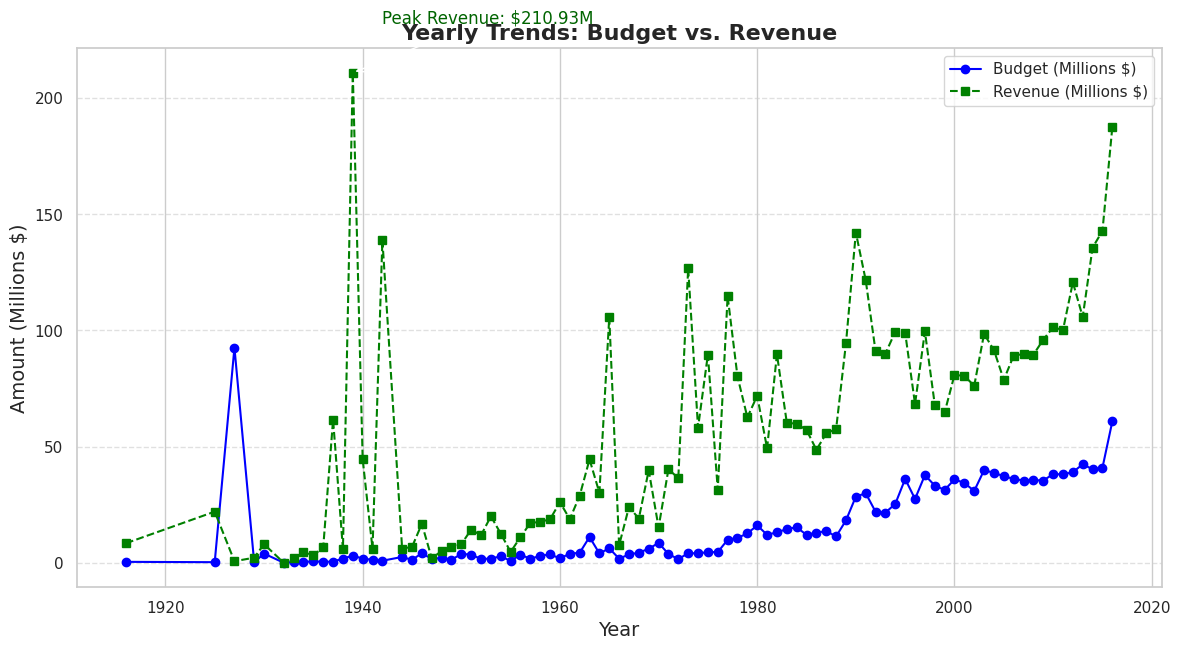

In [13]:
#How does the release year affect the budget, revenue, or popularity trends?
#For knowing about this question I plot the chart below for reaching meaningful insights.
# 5. Line Chart for Yearly Trends of Budget, Revenue.
# I tried to import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# I tried to extract release years and calculate yearly averages
movies_df['release_year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year
#Let's calculate average budget and revenue per year
#I also remove rows with zero values
yearly_trends = movies_df.groupby('release_year')[['budget', 'revenue']].mean()
yearly_trends = yearly_trends[(yearly_trends > 0).all(axis=1)]
#Let's plot our graph
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")
#Let's plot budget and revenue trends
plt.plot(yearly_trends.index, yearly_trends['budget']/ 1e6, label='Budget (Millions $)', marker='o', color='blue')
plt.plot(yearly_trends.index, yearly_trends['revenue']/ 1e6, label='Revenue (Millions $)', marker='s', color='green', linestyle='--')
#For adding the title and labels
plt.title('Yearly Trends: Budget vs. Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount (Millions $)', fontsize=14)
plt.legend()
#For highlight peak revenue year
max_year = yearly_trends['revenue'].idxmax()
max_value = yearly_trends['revenue'].max() / 1e6
#For highlighting the year with the highest revenue:
plt.annotate(f"Peak Revenue: ${max_value:.2f}M", xy=(max_year, max_value), xytext=(max_year + 3, max_value * 1.1),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='darkgreen')
#Let's better the shape
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

*** Final Discussion and Conclusion***

***Strengths:***

This exploratory analysis pipeline is versatile and provides clear visualizations for various insights. It integrates data cleaning, transformation and visualization effectively.


***Limitations:***

some data is missing or inconsistent for example: release dates, budget values and they are maybe affect the accuracy of trends and insights.



***Insights and Implications:***


I have written each section insights sepratly but in general, the analysis reveals key factors influencing movie success. Such as budget, genre ,runtime , and production companies. Business implications include focusing investments on high-performing genres and leveraging the expertise of successful production companies.


***Recommendations:***

1.We have to invest in popular genres like action and adventure to maximize audience reach.

2.Consider runtime preferences for better reception.

3.collaborate with leading production companies for higher chances of commercial success.

4.We have to monitor yearly trends to adjust budgets and marketing strategies accordingly and based on our observations.

5.Companies can create hybrid movies. For example, blending comedy and drama might just hit the sweet spot for a lot of different viewers.



# **Referencing:**


1-TMDB (2023) TMDB Movie Metadata. version 1.kaggle. available at: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata


2-Mckinney, W. (2017). python for data analysis: Data Wrangling with pandas, Numpy, and Jupyter. 2nd ed. O'Reilly media.


3-Plotly Technologies Inc.(2024). plotly documentation. available at: https://plotly.com/python/.



In [14]:
#For creating the Html file:
!jupyter nbconvert --execute --to html "/content/B106_Final_Project.ipynb"


[NbConvertApp] WARNING | pattern '/content/B106_Final_Project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=Tru